# MA4705 Continual Assessment

Group: DSP X

Members: Student name 1 (username 1), Student name 2 (username 2)

# Calculating Angles of a Suspended Body

The orientation of a still body suspended in the air can be described by the pitch, roll, and yaw. These angles are taken with reference to the axes in the North,East, and Down (NED) coordinate space. 

One method by which the orientation angles can be calculated is through the use of an accelerometer and a magnetometer that are mounted on the body. The accelerometer measures acceleration in 3 dimensional space. When it is absolutely still, the accelerometer measures gravitational acceleration or '1g' (red vector in Fig. A). The position of the axes depends on the orientation of the body (blue axes x, y, and z in Fig. A) and the accelerometer readings are the projections of the gravitational vector on these axes (green components mapped on the axes in Fig. A). On the other hand, the magnetometer points to the magnetic north. 

The orientation of the body, or its pitch, roll, and yaw are taken with reference to the North, East, and Down (NED) coordinate space as seen in Fig. B. We wish to work out the body orientation by fulfilling the following objectives.

1. Obtain the rotation/transformation matrix that will transform the NED coordinates to the current accelerometer readings with the help of the magnetometer.
2. Compute the pitch, roll, and yaw from the transformation matrix.

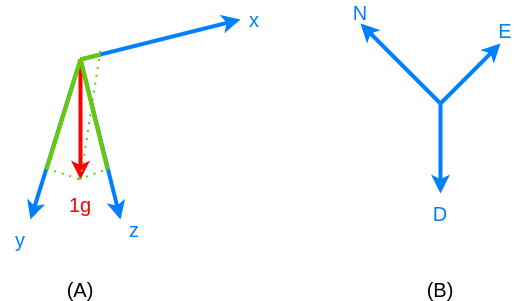


## Obtaining the Rotation matrix

Specifically, the transformation matrix rotates a vector from NED space to an Accelerometer 1g vector ($[a_{x}, a_{y}, a_{z}]^T$) as shown below.

$ 
\begin{equation}
\begin{pmatrix}
r_{00}, r_{01}, r_{02}\\
r_{10}, r_{11}, r_{12}\\
r_{20}, r_{21}, r_{22}
\end{pmatrix}
\begin{pmatrix}
n\\
e\\
d
\end{pmatrix}
=
\begin{pmatrix}
a_{x}\\
a_{y}\\
a_{z}
\end{pmatrix}
\end{equation}
$

The rotation matrix takes the following form where 'a' and 'm' refer to the accelerometer and magnetometer measurements respectively. Each measurement is a vector of 3 elements - $\bf{a} = [a_{x}, a_{y}, a_{z}]^T$ and $\bf{m} = [m_{x}, m_{y}, m_{z}]^T$. 

1. The first column from the right is the raw accelerometer reading. 
2. The second column is the cross product between vector $\bf{a}$ and $\bf{m}$.
3. The third column is the cross product between the second column and $\bf{a}$.

$ 
\begin{equation}
R = 
\begin{pmatrix}
r_{00}, r_{01}, r_{02}\\
r_{10}, r_{11}, r_{12}\\
r_{20}, r_{21}, r_{22}
\end{pmatrix}
= [((a \times m) \times a), (a \times m), a]
\end{equation}
$

## Obtaining the Pitch, Roll, and Yaw

The orientation of the body can be worked out using the elements of the rotation matrix $R$ alone, as follows.


$\begin{equation}
\text{Pitch} = \arcsin(r_{02})
\end{equation}$

$\begin{equation}
\text{Yaw} = \arctan(\frac{r_{12}}{r_{22}})
\end{equation}$

$\begin{equation}
\text{Roll} = \arctan(\frac{r_{01}}{r_{00}})
\end{equation}$

## Obtaining the cross product between 2 vectors

The cross product $z$, between 2 vectors $x = [x_{1}, x_{2}, x_{3}]$ and $y = [y_{1}, y_{2}, y_{3}]$, is as follows.

$z = [(x_{2}y_{3} - x_{3}y_{2}), (x_{1}y_{3} - x_{3}y_{1}), (x_{1}y_{2} - x_{2}y_{1})]$


In [ ]:
# Use these libraries and packages ONLY for implementing your solution.

import numpy as np
import pickle as pickle
from scipy import signal
from scipy.fft import fft, ifft
import matplotlib.pyplot as plt

## The Raw Data

Below are plots of the raw accelerometer (Units $ms^{-2}$) and magnetometer data (Units $\mu T$) with time. Note that both data streams are sampled at 250 Hz. 

In [ ]:
with open("<path to aggregated.pkl>", "rb") as fid:
    data = pickle.load(fid)

fig, (ax1, ax2) = plt.subplots(2,1)

# Retrieve ACC data.                                                                                                                                                    
ts_ACC = data['ACC'][:,0]  # Timestamps for ACC data.
acc_x = data['ACC'][:,1]
acc_y = data['ACC'][:,2]
acc_z = data['ACC'][:,3]

# Retrieve MAG data.
ts_MAG = data['MAG'][:,0]  # Timestamps for MAG data.
mag_x = data['MAG'][:,1]
mag_y = data['MAG'][:,2]
mag_z = data['MAG'][:,3]

# Orientation results.
ts_ORI = data['ORI'][:,0]  # Timestamps for ORIENTATION data.
pitch_ref = data['ORI'][:,1]
yaw_ref = data['ORI'][:,2]
roll_ref = data['ORI'][:,3]

# Plot ACC data.
ax1.plot(ts_ACC, acc_x)
ax1.plot(ts_ACC, acc_y)
ax1.plot(ts_ACC, acc_z)
ax1.set(xlabel='Time/ns', ylabel='m/s2', title='Raw Accelerometer Data')
ax1.legend(['acc_x', 'acc_y', 'acc_z'])

# Plot MAG data.
ax2.plot(ts_MAG, mag_x)
ax2.plot(ts_MAG, mag_y)
ax2.plot(ts_MAG, mag_z)
ax2.set(xlabel='Time/ns', ylabel='uT', title='Raw Magnetometer Data')
ax2.legend(['mag_x', 'mag_y', 'mag_z'])

## a. Based on the background information in the notebook, work out the orientation i.e. its pitch, roll and yaw from the original accelerometer (ACC) and magnetometer (MAG) data from the pickled file 'aggregated.pkl'. Plot the orientation data in a chart. You may check that your results are correct by comparing it with the reference results in 'pitch', 'roll', and 'yaw'. [5 marks]

In [ ]:
# Implement the method needed to get the rotation matrix.
def getRotationMatrix(acc_x_sample, acc_y_sample, acc_z_sample, mag_x_sample, mag_y_sample, mag_z_sample):
    ...

# Implement the method required to obtain the pitch, roll, and yaw.
def getOrientation(R):
    ...

# Calculate the orientation for each ACC and MAG reading.


# Plot your results as well as the reference pitch, roll, and yaw in 2 separate charts.



## b. In reality, signals are usually corrupted by different sources of noise such as the electrical mains noise (periodic 50 Hz noise) and radio interference. The file 'synthetic.pkl' contains these noisy signals. Carry out an FFT analysis on the x-axis of the accelerometer in synthetic.pkl to demonstrate the presence of 50 Hz noise. Design a suitable filter to remove the noise as much as possible from the entire dataset and plot the filtered signals in a chart (Do NOT use an FFT filter to solve this problem). [5 marks]

In [ ]:
# Unpickle the file 'synthetic.pkl'
with open("<path to synthetic.pkl>", "rb") as fid:
    data = pickle.load(fid)
    
noisy_acc_x = ...
noisy_acc_y = ...
noisy_acc_z = ...

noisy_mag_x = ...
noisy_mag_y = ...
noisy_mag_z = ...

# Carry out an FFT analysis on the acc_x and plot the spectrum.


# Design a suitable filter to remove the noise.


# Run the filter over the dataset.


## c. Work out the device orientation using your noisy and filtered signals, and plot the signals in order to make comparisons between them, specifically noisy_pitch vs. filtered_pitch, noisy_yaw vs. filtered_yaw, and noisy_roll vs. filtered_roll. [5 marks]

In [ ]:
# Work out the orientations from original synthetic. You may reuse the methods 'getRotationMatrix' and 'getOrientation'.
noisy_pitch = np.zeros(len(noisy_acc_x))
noisy_yaw = np.zeros(len(noisy_acc_x))
noisy_roll = np.zeros(len(noisy_acc_x))

...

# Work out the orientations from your filtered data.
filtered_pitch = np.zeros(len(filtered_acc_x))
filtered_yaw = np.zeros(len(filtered_acc_x))
filtered_roll = np.zeros(len(filtered_acc_x))

...

# Plot your computed pitch, roll and roll and compare them with the original results.


## d. Identify the second source of noise from your earlier plot and design a second stage filter in order to improve the signal quality. Re-plot the signals to demonstrate improvements. [5 marks]

In [ ]:
# Implementation of second stage filter.


# Plot the resulting orientations.
